In [1]:
import pandas as pd
from genepeeks.common import utilities as util
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tabletext
from scipy.stats import poisson

INFO:config:Using default ini file from: /Users/msilver/Dropbox (GenePeeks)/Max_workspace/genepeeks-science/genepeeks/common/../../conf/genepeeks.ini


#### Add poisson values to PEM contingency table since scipy.stats could not be imported on amazon instance

In [38]:
initial_df = pd.read_csv("../exon_data/subj_contingency_table.csv", header=1)

cutoff_fraction = 0.01
headers = []
full_table = []
exon_fields = ['total', 'lower_outl', 'lower_poisson', 'upper_outl', 'upper_poisson']
for i, header in enumerate(initial_df.columns):
    if i < 6:
        if i != 0:
            headers.append(header)
        for subj_i, item in enumerate(initial_df[header]):
            if i == 0:
                full_table.append([])
            else:
                full_table[subj_i].append(item)
    if header.endswith('total'):
        exon = header.split('_')[0]
        for field in exon_fields:
            headers.append('{}_{}'.format(exon, field))
        
        exon_values = zip(initial_df[header], initial_df[df.columns[i + 1]], initial_df[df.columns[i + 2]])
        for subj_i, (total, lower, upper) in enumerate(exon_values):
            expected = total * cutoff_fraction
            lower_poisson = 1.0 - poisson.cdf(lower, expected)
            upper_poisson = 1.0 - poisson.cdf(upper, expected)

            subj_exon_stats = [total, lower, lower_poisson, upper, upper_poisson]
            full_table[subj_i] += subj_exon_stats
            
full_table.insert(0, headers)

# Convert to pandas data frame and export to csv
full_df = pd.DataFrame(full_table)
full_df.to_csv("../exon_data/PEM_contingency_table.csv")

In [39]:
full_df = pd.read_csv("../exon_data/PEM_contingency_table.csv", header=1)

#### Look at the number of subjects with low p values for each exon

┌─────────┬───────────────────────┬────────────────────────┬─────────────────────────┬────────────────────────┐
│ Exon    │ Count with CDF < 0.01 │ Count with CDF < 0.001 │ Count with CDF < 0.0001 │ Count with CDF < 1e-05 │
├─────────┼───────────────────────┼────────────────────────┼─────────────────────────┼────────────────────────┤
│ Ex1     │                     0 │                      0 │                       0 │                      0 │
├─────────┼───────────────────────┼────────────────────────┼─────────────────────────┼────────────────────────┤
│ Ex2     │                     0 │                      0 │                       0 │                      0 │
├─────────┼───────────────────────┼────────────────────────┼─────────────────────────┼────────────────────────┤
│ Ex3     │                     0 │                      0 │                       0 │                      0 │
├─────────┼───────────────────────┼────────────────────────┼─────────────────────────┼──────────────────

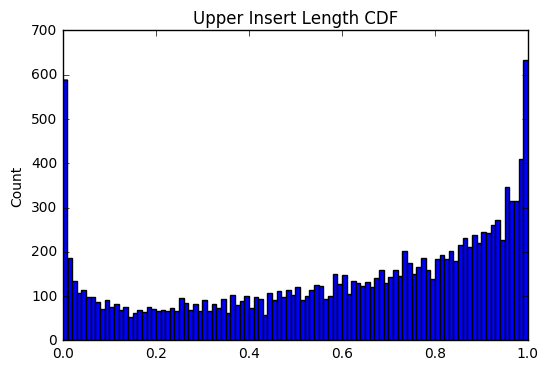

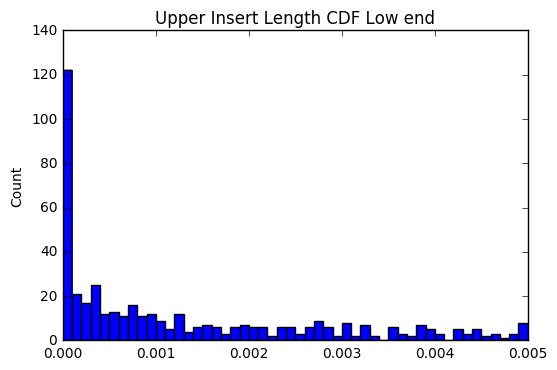

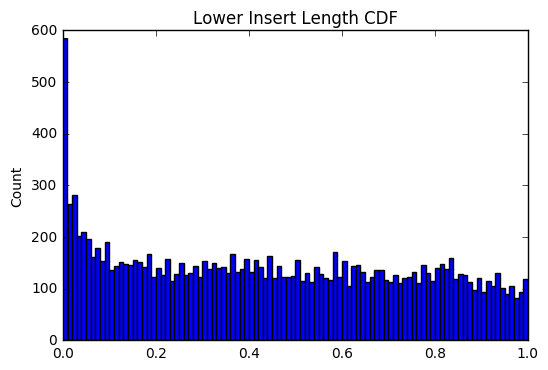

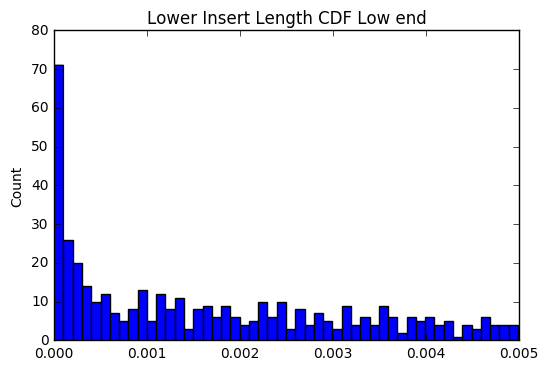

In [40]:
p_val_cutoffs = [0.01, 0.001, 0.0001, 0.00001]
headers = ['Exon'] + ['Count with CDF < {}'.format(cutoff) for cutoff in p_val_cutoffs]
exon_low_p_val_count = [headers]
all_p_values = {'Lower': [], 'Upper': []}

# Only look at subjects that were not from the initial batch of created subjects
new_subj_df = full_df[full_df['date_modified'] > 1465401045]
for i, col in enumerate(full_df.columns):
    if 'upper_poisson' in col:
        exon = col.split('_')[0]
        exon_upper_poisson = new_subj_df[col]
        all_p_values['Upper'] += list(exon_upper_poisson)
        all_p_values['Lower'] += list(new_subj_df[full_df.columns[i-2]])
        exon_data = [exon] + [len(filter(lambda x: x < cutoff, exon_upper_poisson)) for cutoff in p_val_cutoffs]
        exon_low_p_val_count.append(exon_data)
        
#         plt.hist(upper_list, bins=50)
#         plt.title("{} Insert Length CDF".format(exon))
#         plt.ylabel("Count")
#         plt.show()
        
print tabletext.to_text(exon_low_p_val_count)

# Plot histograms of all the p_values
for outl_side, p_values in all_p_values.items():
    plt.hist(p_values, bins=100)
    plt.title("{} Insert Length CDF".format(outl_side))
    plt.ylabel("Count")
    plt.show()

    clipped_p_values = [item for item in p_values if item < 0.005]
    plt.hist(clipped_p_values, bins=50)
    plt.title("{} Insert Length CDF Low end".format(outl_side))
    plt.ylabel("Count")
#     plt.xscale('log')
    plt.show()


#### Look at the number of exons with low p values for each subject

In [12]:
subj_p_val_cutoffs = [0.0001, 0.00001, 0.000001]

headers = ['Subject'] + ['Exons with CDF < {}'.format(cutoff) for cutoff in subj_p_val_cutoffs]
subject_table = [headers]
subject_poisson_array = np.array(subject_poisson_table)
for i in range(len(subject_poisson_table[0])):
    subject = df.subject[i]
    subject_p_values = subject_poisson_array[:,i]
    subject_data = [subject] + [len(filter(lambda x: x < cutoff, subject_p_values)) for cutoff in subj_p_val_cutoffs]
    subject_table.append(subject_data)
print tabletext.to_text(subject_table)

┌────────────────┬─────────────────────────┬────────────────────────┬────────────────────────┐
│ Subject        │ Exons with CDF < 0.0001 │ Exons with CDF < 1e-05 │ Exons with CDF < 1e-06 │
├────────────────┼─────────────────────────┼────────────────────────┼────────────────────────┤
│ FCLR-GP01-2121 │                       1 │                      0 │                      0 │
├────────────────┼─────────────────────────┼────────────────────────┼────────────────────────┤
│ MESB-0009-690N │                       0 │                      0 │                      0 │
├────────────────┼─────────────────────────┼────────────────────────┼────────────────────────┤
│ MMCB-0000-209K │                       0 │                      0 │                      0 │
├────────────────┼─────────────────────────┼────────────────────────┼────────────────────────┤
│ MESB-0009-662M │                       0 │                      0 │                      0 │
├────────────────┼─────────────────────────┼──────

#### Examine recent subjects that had too many outliers in Exon 71 (examining false positives)

In [28]:
full_df[(full_df['Ex71_upper_poisson'] < 0.00001) & (full_df['date_modified'] > 1465401045)].filter(regex=('Ex71|subject|cutoff')).sort_values(by='Ex71_upper_outl', ascending=False)


,subject,lower_0.01_cutoff,upper_0.01_cutoff,Ex71_total,Ex71_lower_outl,Ex71_lower_poisson,Ex71_upper_outl,Ex71_upper_poisson
52,FGPC-1PR1-SON4,93.0,608.0,225,2,0.390661,15,2.501798e-09
255,FRMR-0070-444H,86.0,552.0,148,0,0.772362,14,6.863798e-11
352,FPWB-0000-721V,99.0,591.0,284,1,0.775645,14,3.416749e-07
358,FGPC-0000-6087,84.0,558.0,248,1,0.708574,13,3.822419e-07
258,FPWB-0000-995C,83.0,569.0,161,0,0.800112,13,2.017760e-09
202,FRMR-00ID-7962,94.0,593.0,192,1,0.571908,12,1.312653e-07
39,FPWB-0001-083Y,128.0,648.0,132,0,0.732865,12,1.748298e-09
360,FGPC-INSR-YI4C,87.0,615.0,177,1,0.528178,12,5.233456e-08
133,FPWB-0001-106Y,81.0,547.0,195,4,0.048255,12,1.562103e-07
59,FRMR-00NC-7632,95.0,603.0,129,0,0.724729,12,1.333024e-09
